### **Problem Definition**
##### Our goal is to predict the market value of football players based on their attributes using AI techniques. This is a regression problem where we aim to estimate a continuous value (market value) based on input features (player attributes like: shots, height, goal per shot etc).








### **Libraries Used**
##### We start by importing necessary libraries for data manipulation, visualization, performance testing and machine learning.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


### **Data Exploration**
##### First we explore the dataset to analyze the kind of data it contains which will be used for our further actions like visualization and training our model.



##### In the code below:
   - We uploaded the soccer_player csv file on github and we generated a raw link which we used to access the dataset.
   - Then we loaded and stored the dataset inside 'data' vairable.

In [ ]:
# Imported and fetching the dataset CSV from github
url ='https://raw.githubusercontent.com/ankushnaudiyal/Datasets/main/soccer_player.csv'

# Load the dataset
data = pd.read_csv(url)

 - To display first few rows of the dataset we used 'data.head()'.

In [ ]:
# Display the first few rows of the dataset
print(data.head(5))

   Unnamed: 0   League           player  Substitution   xG Per Avg Match  \
0           0      MLS     Robert Beric              1              0.46   
1           1  La Liga    Karim Benzema              0              0.63   
2           2  La Liga     Carlos Soler              1              0.53   
3           3  La Liga   Cristian Tello              4              0.29   
4           4  La Liga  Mikel Oyarzabal              2              0.88   

   Shots  OnTarget  Shots Per Avg Match  On Target Per Avg Match     value  \
0     62        28                 2.86                     1.29   2400000   
1     27        12                 3.46                     1.54  32000000   
2      8         5                 1.27                     0.79  40000000   
3     22         8                 3.32                     1.21   4000000   
4     31        16                 4.00                     2.07  48000000   

   ... goals goals_per_shot passes_completed  assisted_shots  passes_block

 - To check if there are any missing values we used 'data.isnull().sum()'

In [ ]:
# Check for missing values
print(data.isnull().sum())

Unnamed: 0                 0
League                     0
player                     0
Substitution               0
xG Per Avg Match           0
Shots                      0
OnTarget                   0
Shots Per Avg Match        0
On Target Per Avg Match    0
value                      0
nationality                0
position                   0
squad                      0
goals                      0
goals_per_shot             0
passes_completed           0
assisted_shots             0
passes_blocked             0
touches                    0
height                     0
assists                    0
games_starts               0
minutes                    0
dtype: int64


### **Data Visualisation**
##### Data visualization helps us understand the relationships between features and identify patterns in the data.


First we start by selecting features or attributes from our dataset which we are going to use for plotting and predictions.


In [ ]:
# Select features for plotting and prediction
features = ['height', 'goals_per_shot', 'goals', 'OnTarget', 'assists', 'minutes', 'passes_completed', 'passes_blocked']

   #### **Histogram**

   Now we plot our first graph which is a Histogram chart to analyze the data by selected features.
   
   Each feature is represented by a histogram, which shows the distribution of the data for that particular feature.

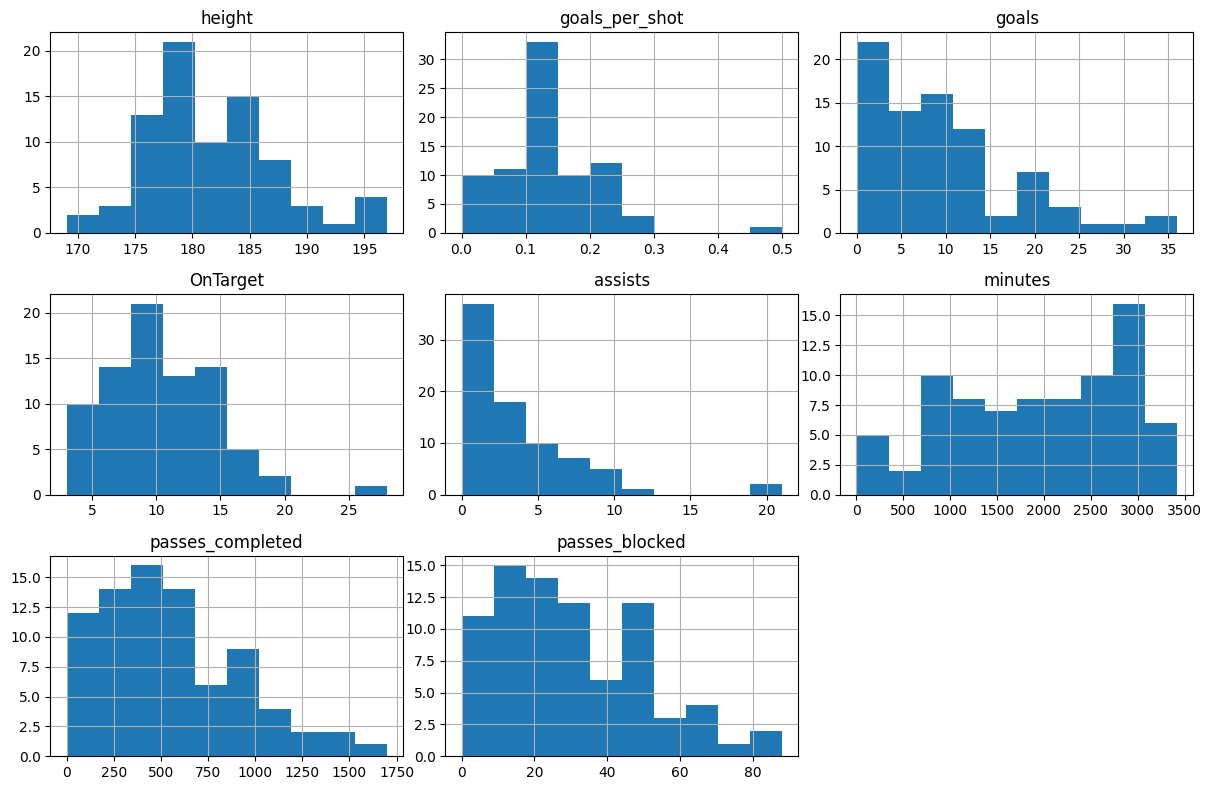

In [ ]:
# Histograms of selected features
data[features].hist(figsize=(12, 8))
plt.tight_layout()
plt.show()


 By analyzing these histograms, you can gain insights into the distribution of the data for each feature. For example, you can see which height range is most common among the players. This information can be helpful for understanding the overall characteristics of the dataset and for identifying any potential outliers.

#### **Correlation Heatmap**

Now we plot our second chart, Correlation Heatmap chart which is a graphical representation of the correlation coefficients between different variables.

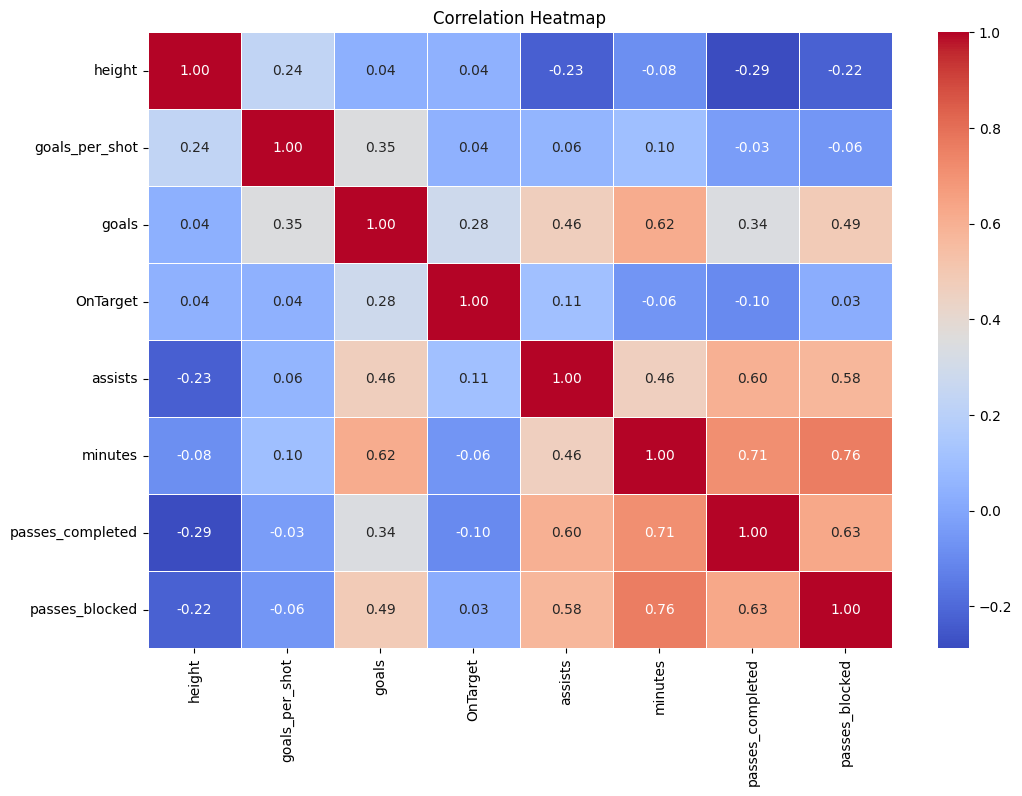

In [ ]:
# Heatmap of correlations between features
plt.figure(figsize=(12, 8))
sns.heatmap(data[features].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation between Features')
plt.show()

#### **Scatter Plot**

This is our final chart, Scatter plot is a type of data visualization that displays the relationship between two variables. It is particularly useful for identifying patterns, correlations, and trends in data.

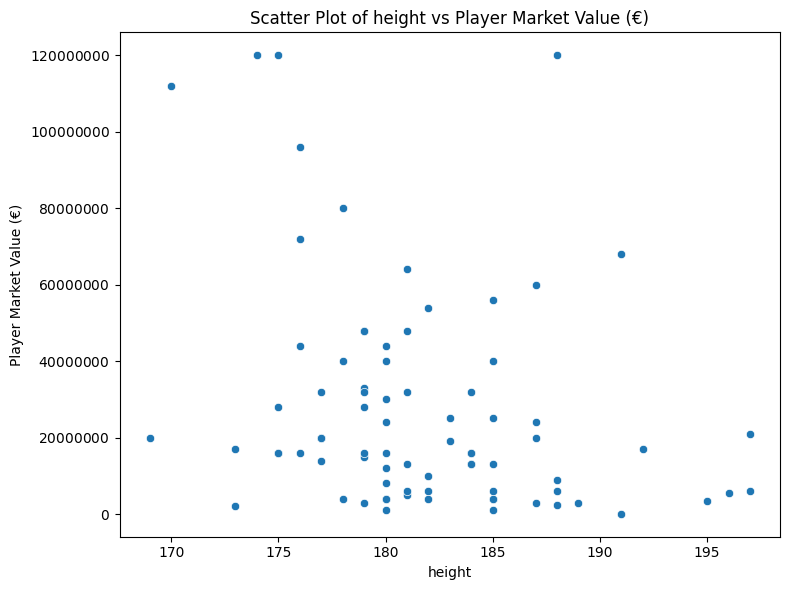

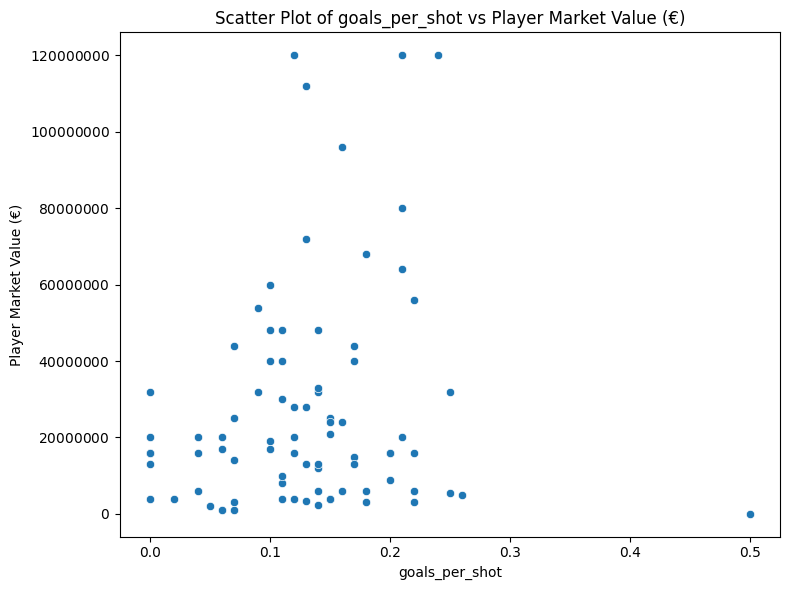

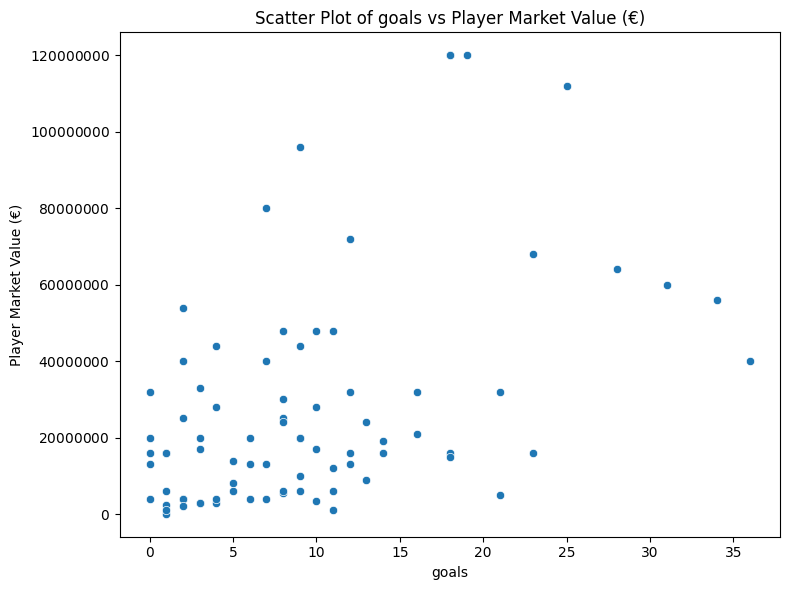

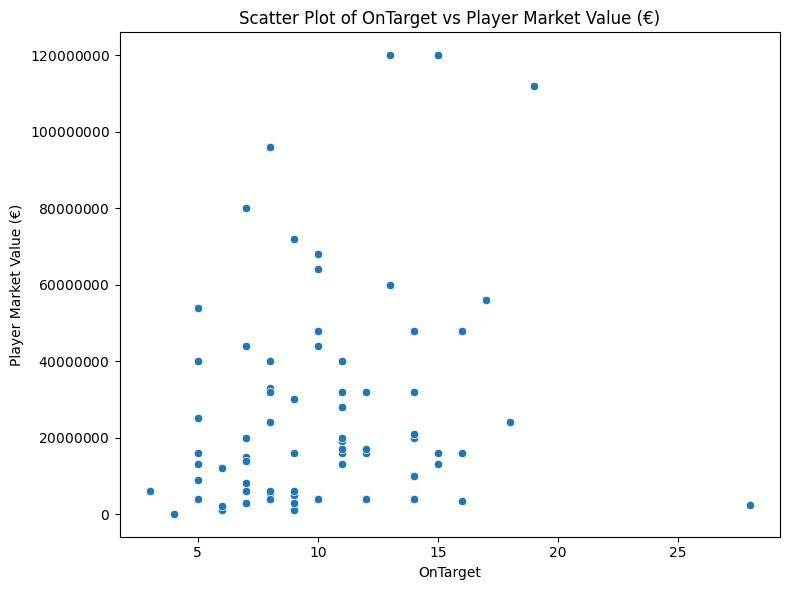

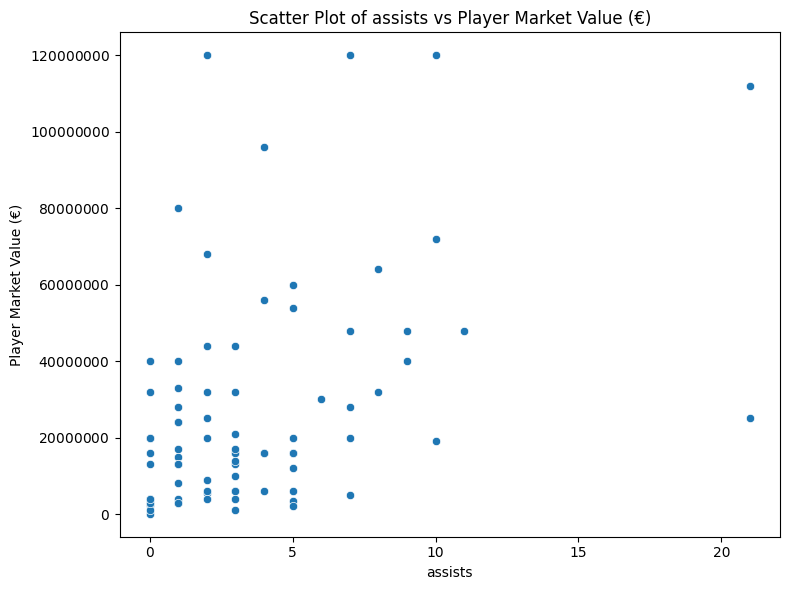

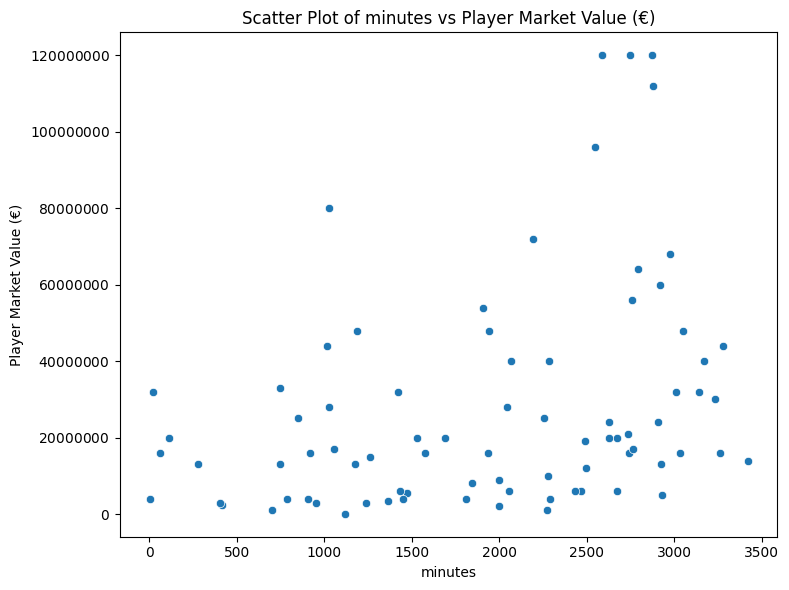

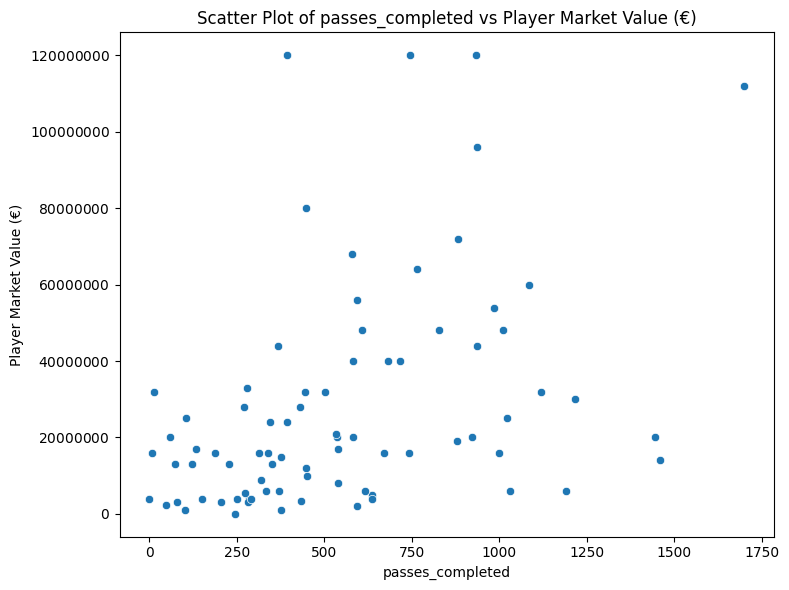

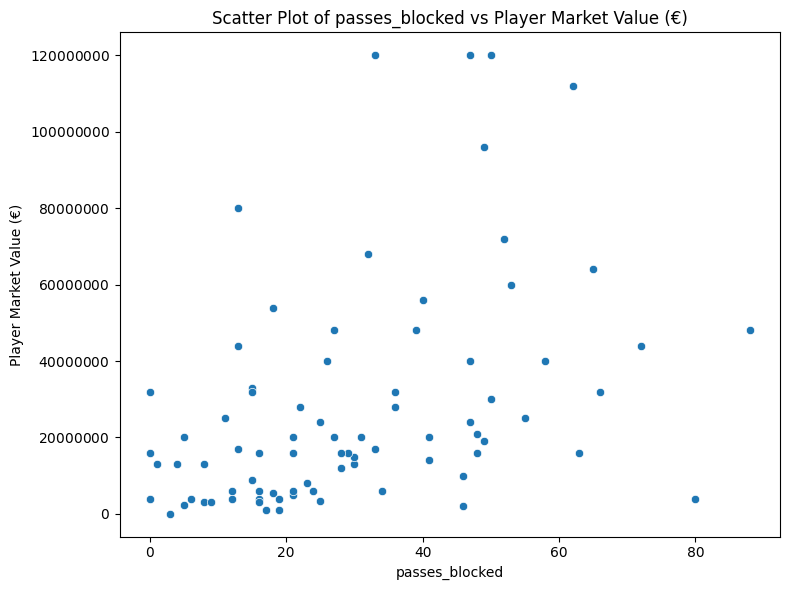

In [ ]:
import matplotlib.ticker as ticker

# Create scatter plot
for feature in features:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=data[feature], y=data['value'])
    plt.title(f"Scatter Plot of {feature} vs Player Market Value (€)")
    plt.xlabel(feature)
    plt.ylabel("Player Market Value (€)")
    scaler_formatter = ticker.ScalarFormatter(useMathText=True)
    scaler_formatter.set_scientific(False)
    plt.gca().yaxis.set_major_formatter(scaler_formatter)  # Set y-axis tick format to 'plain'
    plt.tight_layout()
    plt.show()


In [ ]:
# Extract features and target variable
X = data[features]
y = data['value']

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

###  ***Model Selection***
##### We experiment with multiple regression algorithms to find the best-performing model. Here, we'll use Linear Regression, Random Forest Regression, K-Nearest Neighbors Regression, and Support Vector Regression.

In [ ]:
# Initialize regression models
selected_models = {
    'Linear Regression': LinearRegression(),
    'Random Forest Regression': RandomForestRegressor(),
    'KNN Regression': KNeighborsRegressor(),
    'SVR': SVR()
}

# Train and evaluate each model
for name, model in selected_models.items():
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, predictions)
    print(f"{name}: MAE={mae}, MSE={mse}, RMSE={rmse}, R^2={r2}")

Linear Regression: MAE=17738894.708906233, MSE=493451155326209.5, RMSE=22213760.49493218, R^2=-0.42074436040729024
Random Forest Regression: MAE=18448759.375, MSE=616836333666562.5, RMSE=24836189.999002714, R^2=-0.7759949143735041
KNN Regression: MAE=18175000.0, MSE=530646250000000.0, RMSE=23035760.24358649, R^2=-0.527836461463713
SVR: MAE=13912498.818658955, MSE=362528674324570.44, RMSE=19040185.7744238, R^2=-0.04379240776540416


### **Hyperparameter Tuning (Optional)**
##### We can fine-tune hyperparameters for models like Random Forest Regression using techniques such as grid search or random search to improve performance.

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Random Forest Regression model
rf_reg = RandomForestRegressor()

# Grid search
grid_search = GridSearchCV(estimator=rf_reg, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error', verbose=1)
grid_search.fit(X_scaled, y)

# Best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Best model
best_rf_model = grid_search.best_estimator_

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}


### Validation
##### We validate the models' performance using cross-validation to ensure their robustness and generalization to unseen data.

In [ ]:
# Cross-validation scores
for name, model in models.items():
    cv_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='neg_mean_absolute_error')
    print(f"{name} Cross-validation Mean MAE: {-np.mean(cv_scores)}")

# Identify the best-performing algorithm
best_model_name = max(models, key=lambda x: np.mean(cross_val_score(models[x], X_scaled, y, cv=5, scoring='neg_mean_absolute_error')))
print("Best Model:", best_model_name)

Linear Regression Cross-validation Mean MAE: 17872267.1068883
Random Forest Regression Cross-validation Mean MAE: 19941292.8125
KNN Regression Cross-validation Mean MAE: 18315343.75
SVR Cross-validation Mean MAE: 19894092.751382746
Best Model: Linear Regression


Here we got the best model and the highest mean cross validation score of all models.

### Predicting Market Value
Finally, we test our model for prediciting football players market value by givng input data to the model.

In [ ]:
input_data = {
    'height': 160,  # in centimeters
    'goals_per_shot': 100,
    'goals': 60,
    'OnTarget': 20,
    'assists': 60,
    'minutes': 3500,
    'passes_completed': 10,
    'passes_blocked': 30,

}

# Convert input data into a DataFrame
input_df = pd.DataFrame(input_data, index=[0])

# Scale the input data using the same scaler used for training
input_scaled = scaler.transform(input_df)

# Use the best model for prediction
predicted_market_value = best_rf_model.predict(input_scaled)

print("Predicted Market Value (€):", predicted_market_value[0])



Predicted Market Value (€): 54798196.96969699


Here in output, we got the predicted market value of a football player.